In [1]:
## https://www.quantstart.com/articles/Cointegrated-Augmented-Dickey-Fuller-Test-for-Pairs-Trading-Evaluation-in-R/
library("tseries")
set.seed(123)
z <- rep(0, 1000)
for (i in 2:1000) z[i] <- z[i-1] + rnorm(1)
p <- q <- rep(0, 1000)
p <- 0.3*z + rnorm(1000)
q <- 0.6*z + rnorm(1000)
comb <- lm(p~q)
comb

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Call:
lm(formula = p ~ q)

Coefficients:
(Intercept)            q  
     0.1749       0.4745  


In [2]:
adf.test(comb$residuals, k=1)

Warning message in adf.test(comb$residuals, k = 1):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  comb$residuals
Dickey-Fuller = -23.446, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Loading required package: xts
Warning message:
“package ‘xts’ was built under R version 3.6.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.6.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
“package ‘TTR’ was built under R version 3.6.2”Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated")

[1] "EWA"

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”

[1] "EWC"

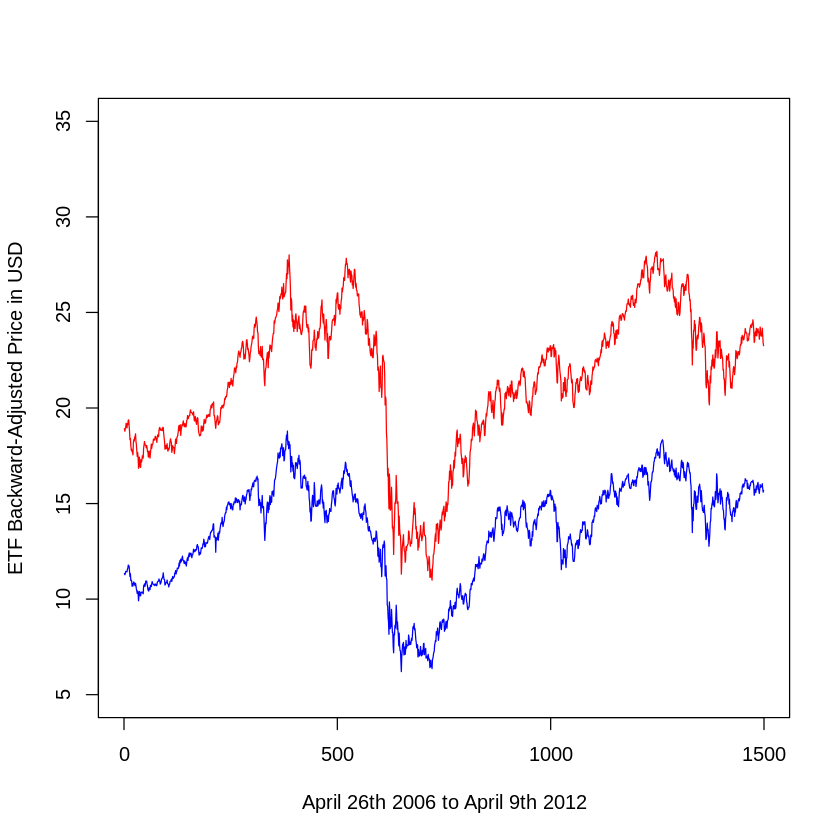

In [3]:
library("quantmod")
getSymbols("EWA", from="2006-04-26", to="2012-04-09")
getSymbols("EWC", from="2006-04-26", to="2012-04-09")
ewaAdj = unclass(EWA$EWA.Adjusted)
ewcAdj = unclass(EWC$EWC.Adjusted)
plot(ewaAdj, type="l", xlim=c(0, 1500), ylim=c(5.0, 35.0), xlab="April 26th 2006 to April 9th 2012", ylab="ETF Backward-Adjusted Price in USD", col="blue")
par(new=T)
plot(ewcAdj, type="l", xlim=c(0, 1500), ylim=c(5.0, 35.0), axes=F, xlab="", ylab="", col="red")
par(new=F)

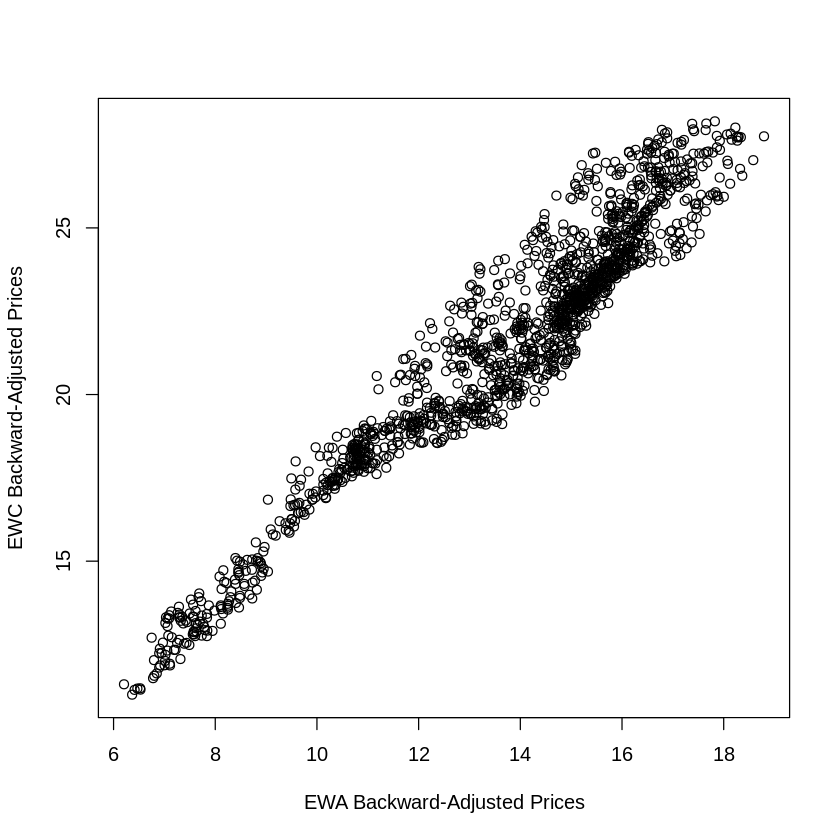

In [4]:
plot(ewaAdj, ewcAdj, xlab="EWA Backward-Adjusted Prices", ylab="EWC Backward-Adjusted Prices")

In [5]:
comb1 = lm(ewcAdj~ewaAdj)
comb2 = lm(ewaAdj~ewcAdj)


Call:
lm(formula = ewcAdj ~ ewaAdj)

Coefficients:
(Intercept)       ewaAdj  
      3.496        1.318  



Call:
lm(formula = ewaAdj ~ ewcAdj)

Coefficients:
(Intercept)       ewcAdj  
    -1.3627       0.6989  


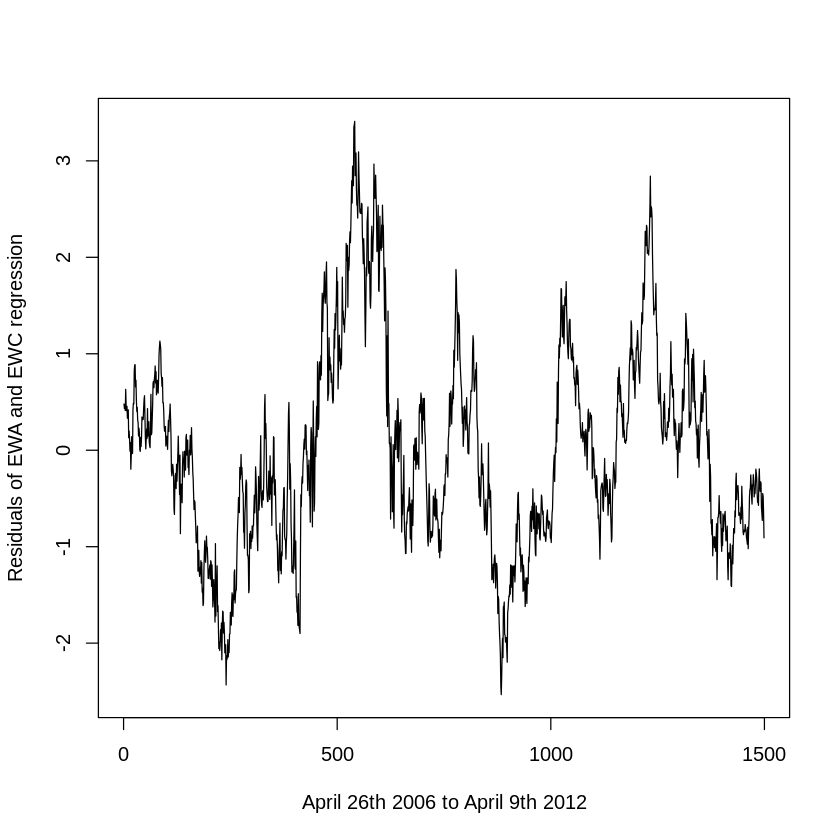

In [8]:
plot(comb1$residuals, type="l", xlab="April 26th 2006 to April 9th 2012", ylab="Residuals of EWA and EWC regression")
comb1
comb2

In [9]:
adf.test(comb1$residuals, k=1)


	Augmented Dickey-Fuller Test

data:  comb1$residuals
Dickey-Fuller = -3.6433, Lag order = 1, p-value = 0.02851
alternative hypothesis: stationary


In [10]:
adf.test(comb2$residuals, k=1)


	Augmented Dickey-Fuller Test

data:  comb2$residuals
Dickey-Fuller = -3.6518, Lag order = 1, p-value = 0.02769
alternative hypothesis: stationary


In [11]:
getSymbols("RDS-A", from="2006-01-01", to="2015-12-31")
getSymbols("RDS-B", from="2006-01-01", to="2015-12-31")
RDSA <- get("RDS-A")
RDSB <- get("RDS-B")
rdsaAdj = unclass(RDSA$"RDS-A.Adjusted")
rdsbAdj = unclass(RDSB$"RDS-B.Adjusted")

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”

[1] "RDS-A"

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”

[1] "RDS-B"

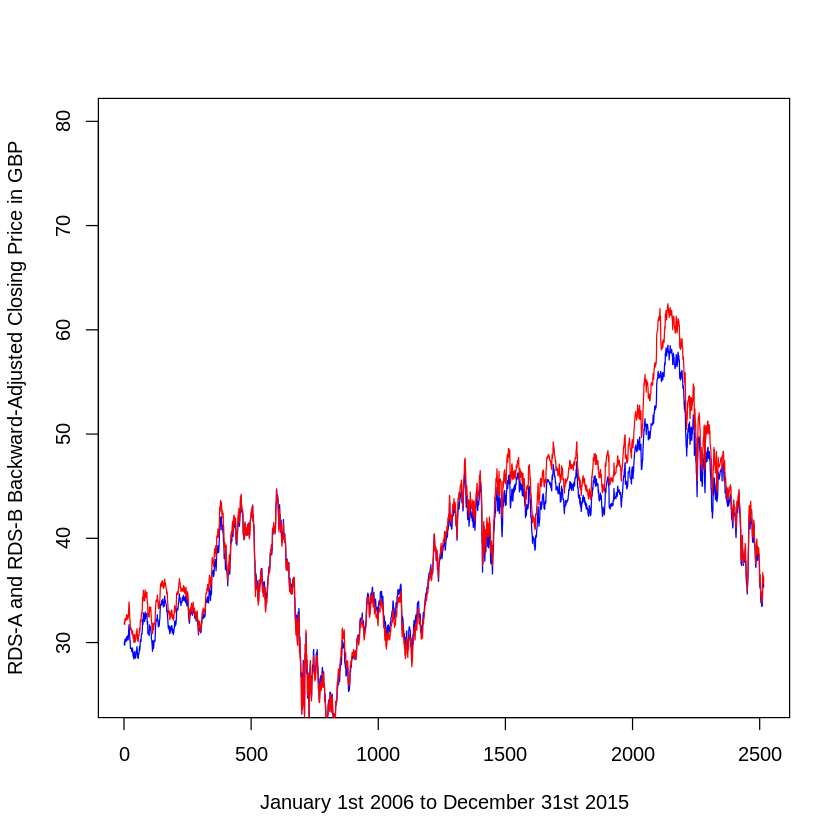

In [12]:
plot(rdsaAdj, type="l", xlim=c(0, 2517), ylim=c(25.0, 80.0), xlab="January 1st 2006 to December 31st 2015", ylab="RDS-A and RDS-B Backward-Adjusted Closing Price in GBP", col="blue")
par(new=T)
plot(rdsbAdj, type="l", xlim=c(0, 2517), ylim=c(25.0, 80.0), axes=F, xlab="", ylab="", col="red")
par(new=F)

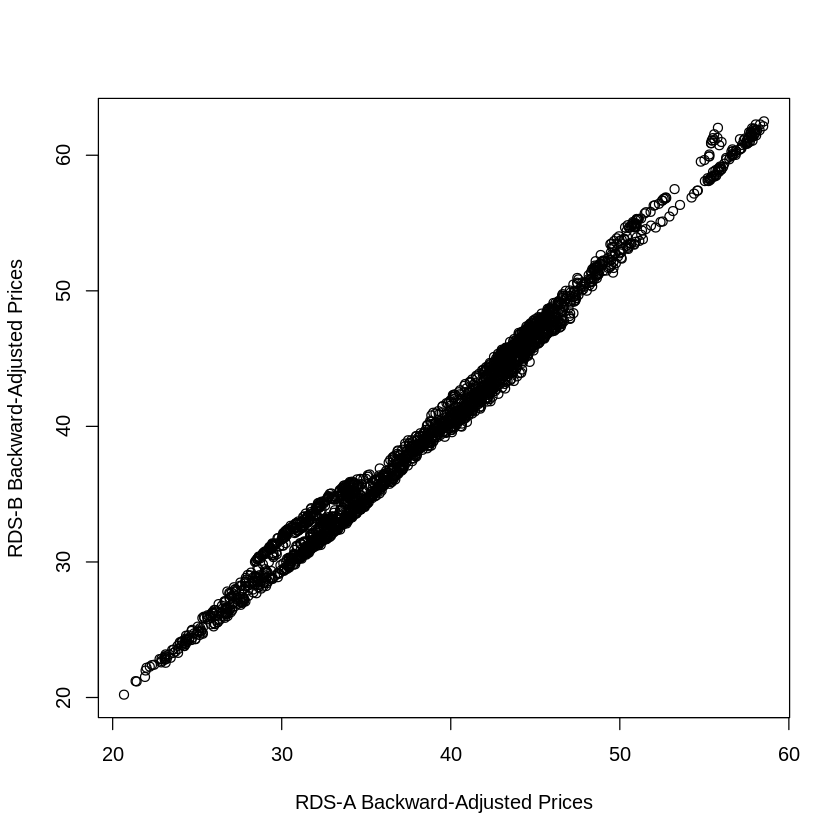

In [13]:
plot(rdsaAdj, rdsbAdj, xlab="RDS-A Backward-Adjusted Prices", ylab="RDS-B Backward-Adjusted Prices")

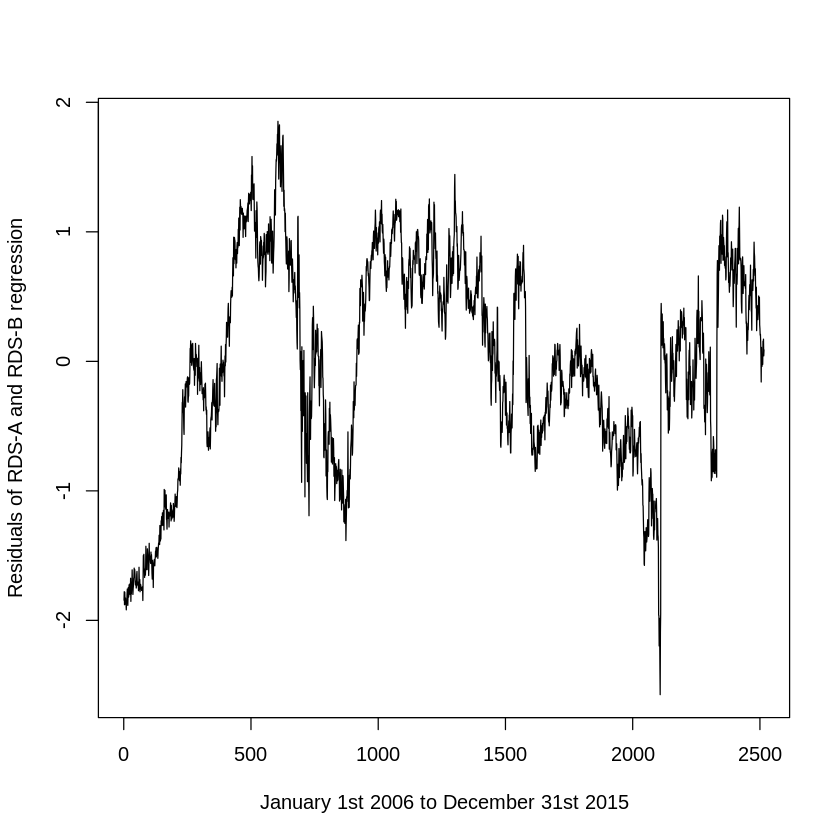

In [14]:
comb1 = lm(rdsaAdj~rdsbAdj)
comb2 = lm(rdsbAdj~rdsaAdj)
plot(comb1$residuals, type="l", xlab="January 1st 2006 to December 31st 2015", ylab="Residuals of RDS-A and RDS-B regression")

In [15]:
adf.test(comb1$residuals, k=1)

Warning message in adf.test(comb1$residuals, k = 1):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  comb1$residuals
Dickey-Fuller = -4.0523, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


In [16]:
adf.test(comb2$residuals, k=1)

Warning message in adf.test(comb2$residuals, k = 1):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  comb2$residuals
Dickey-Fuller = -3.9842, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary
